In [64]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import StateModelRnD
%matplotlib inline 

In [109]:
InVars = 'Fs'
StVarElEqns = "vm' = Fm / m, Fk' = K * vk"
OtherElEqns = 'FB = B * vB'
Constraints = 'Fm = Fs - FB - Fk,vk = vm,vB=vm'
OutputVars = 'vm, Fk'

In [134]:
var('m K B')
Values = {
    m: 0.5,
    K: 10,
    B: 0.01
}

In [135]:
sys = StateModelRnD.find(InVars, StVarElEqns, OtherElEqns, Constraints, OutputVars)

In [160]:
A = np.matrix(sys['A'].subs(Values)).astype(np.float64)
B = np.matrix(sys['B'].subs(Values)).astype(np.float64)
C = np.matrix(sys['C'].subs(Values)).astype(np.float64)
D = np.matrix(sys['D'].subs(Values)).astype(np.float64)

In [145]:
dt = 0.001
x0 = np.matrix([[0.1], [0]])
tf = 5
Fs = np.matrix([[0.2]])

In [146]:
x = np.matrix(np.ndarray((A.shape[0], int(tf/dt) + 1)))
y = np.matrix(np.ndarray((C.shape[0], int(tf/dt) + 1)))

In [147]:
x[:,0] = x0
y[:,0] = C * x0 + D * Vs
for i in range(int(tf/dt)):
    x[:,i+1] = x[:,i] + dt * (A * x[:,i] + B * Fs)
    y[:,i+1] = C * x[:,i+1] + D * Vs

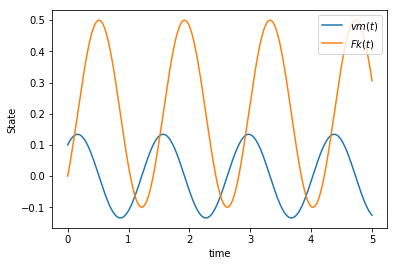

In [161]:
plt.plot(np.arange(0, tf + dt, dt), y.T.A)
plt.xlabel('time')
plt.ylabel('State')
plt.legend(['$vm(t)$', '$Fk(t)$'], loc = 'upper right')